# 1. Business Problem
## 1.1 Problem Context

Our client is a large Real Estate Investment Trust (REIT).
* They invest in houses, apartments, and condos(complex of buildings) within a small county in New York state.
* As part of their business, they try to predict the fair transaction price of a property before it's sold.
* They do so to calibrate their internal pricing models and keep a pulse on the market.

## 1.2 Problem Statement
The REIT has hired us to find a data-driven approach to valuing properties.
* They currently have an untapped dataset of transaction prices for previous properties on the market.
* The data was collected in 2016.
* Our task is to build a real-estate pricing model using that dataset.
* If we can build a model to predict transaction prices with an average error of under US Dollars 75,000, then our client will be very satisfied with the our resultant model.

## 1.3 Business Objectives and Constraints
* Deliverable: Trained model file
* Win condition: Avg. prediction error < \$75,000
* Model Interpretability will be useful
* No latency requirement

# 2. Machine Learning Problem
## 2.1 Data Overview

For this project:
1. The dataset has 1883 observations in the county where the REIT operates.
2. Each observation is for the transaction of one property only.
3. Each transaction was between UD Dollars 200,000 and 800,000.

#### Target Variable
* 'tx_price' - Transaction price in USD

#### Data Dictionary:

Public records:
* 'tx_year' - Year the transaction took place
* 'property_tax' - Monthly property tax
* 'insurance' - Cost of monthly homeowner's insurance

Property characteristics:
* 'beds' - Number of bedrooms
* 'baths' - Number of bathrooms
* 'sqft' - Total floor area in squared feet
* 'lot_size' - Total outside area in squared feet
* 'year_built' - Year property was built
* 'active_life' - Number of gyms, yoga studios, and sports venues within 1 mile
* 'basement' - Does the property have a basement?
* 'exterior_walls' - The material used for constructing walls of the house
* 'roof' - The material used for constructing the roof

Location convenience scores:
* 'restaurants' - Number of restaurants within 1 mile
* 'groceries' - Number of grocery stores within 1 mile
* 'nightlife' - Number of nightlife venues within 1 mile
* 'cafes' - Number of cafes within 1 mile
* 'shopping' - Number of stores within 1 mile
* 'arts_entertainment' - Number of arts and entertainment venues within 1 mile
* 'beauty_spas' - Number of beauty and spa locations within 1 mile
* 'active_life' - Number of gyms, yoga studios, and sports venues within 1 mile

Neighborhood demographics:
* 'median_age' - Median age of the neighborhood
* 'married' - Percent of neighborhood who are married
* 'college_grad' - Percent of neighborhood who graduated college

Schools:
* 'num_schools' - Number of public schools within district
* 'median_school' - Median score of the public schools within district, on the range 1 - 10

## 2.2 Mapping business problem to ML problem
### 2.2.1 Type of Machine Learning Problem
It is a regression problem, where given the above set of features, we need to predict the transaction price of the house.

### 2.2.2 Performance Metric (KPI)
**Since it is a regression problem, we will use the following regression metrics:**
* Root Mean Squared Error (RMSE)
* R-squared
* Mean Absolute Error (MAE)

We are basically aiming to get MAE to be less than $75,000

# Exploratory Data Analysis

In [1]:
# Importing the required libraries

# For Pandas dataframes
import pandas as pd

# For numerical operations 
import numpy as np

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Seaborn for better visualization
import seaborn as sns

In [2]:
# loading the dataset 
df = pd.read_csv('H:/github projects/Real-Estate-master/Files/real_estate_data.csv')

In [3]:
# Checking the size 
df.shape

(1883, 26)

In [4]:
# Inspecting data types
df.dtypes

tx_price                int64
beds                    int64
baths                   int64
sqft                    int64
year_built              int64
lot_size                int64
property_type          object
exterior_walls         object
roof                   object
basement              float64
restaurants             int64
groceries               int64
nightlife               int64
cafes                   int64
shopping                int64
arts_entertainment      int64
beauty_spas             int64
active_life             int64
median_age            float64
married               float64
college_grad          float64
property_tax          float64
insurance             float64
median_school         float64
num_schools           float64
tx_year                 int64
dtype: object

In [5]:
# Inspecting the 1st five rows of the data
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,...,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,...,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,...,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,...,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,...,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,...,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002


Some features are numeric while others are categorical.<br>
Checking categorical features separately

In [6]:
# Looking at only object data type 
df.dtypes[df.dtypes == 'object']

property_type     object
exterior_walls    object
roof              object
dtype: object

In [7]:
# Inspecting the last five rows of the data
df.tail()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,...,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
1878,385000,5,6,6381,2004,224334,Single-Family,Stucco,Composition Shingle,1.0,...,0,1,46.0,76.0,87.0,1250.0,381.0,10.0,3.0,2002
1879,690000,5,6,6501,1956,23086,Single-Family,Brick,Composition Shingle,1.0,...,61,11,42.0,73.0,61.0,1553.0,473.0,9.0,3.0,2015
1880,600000,5,6,7064,1995,217800,Single-Family,Metal,Composition Shingle,1.0,...,1,2,43.0,87.0,66.0,942.0,287.0,8.0,1.0,1999
1881,759900,5,6,7500,2006,8886,Single-Family,Siding (Alum/Vinyl),Asphalt,1.0,...,8,6,43.0,61.0,51.0,803.0,245.0,5.0,2.0,2009
1882,735000,5,6,7515,1958,10497,Single-Family,Brick,Composition Shingle,1.0,...,0,5,37.0,80.0,86.0,1459.0,444.0,9.0,3.0,2015


# Distribution of Numeric Features

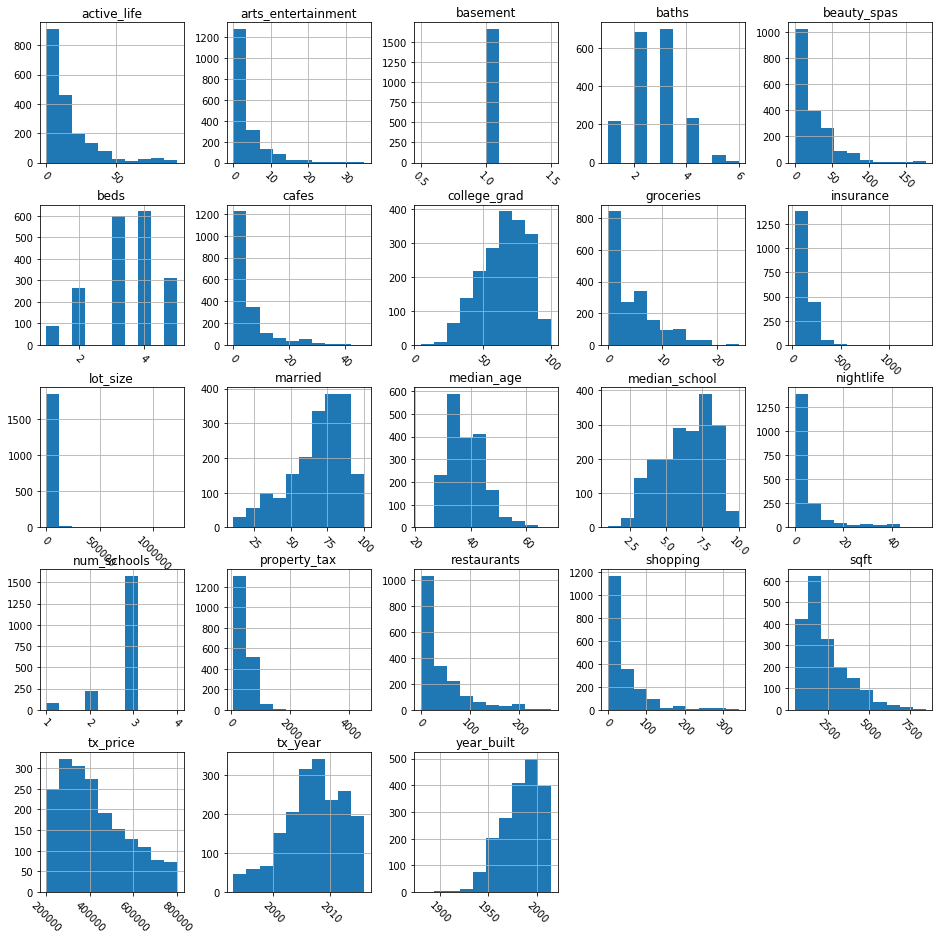

In [8]:
df.hist(figsize=(16,16), xrot=-45)
plt.show()

**Observations:**

* More than 1500 houses have 3 schools with a mile 
* More than 400 houses have area within 2000 sqft 
* Very few houses have area more than 5000 sqft 
* Over 600 houses have 4 bedrooms, and similar number of houses have 3 bedrooms.
* Less than 100 houses have one bedroom and so on.
* The last bin in the histogram 'year_built' represents the range 2010-2020.
* Since this dataset was pulled in 2016, we should not have properties built in 2019.
* A property built after 2016 would be a measurement error.
* However, because of the 10-year bins, it's hard to tell if there's a measurement error just from the plot above.

Check summary statistics of categorical features

In [9]:
df.describe(include='object')

,property_type,exterior_walls,roof
count,1883,1660,1529
unique,2,16,16
top,Single-Family,Brick,Composition Shingle
freq,1080,687,1179


**Observation:**
* 'exterior_walls' and 'roof' have missing values
* There are 16 unique classes for 'exterior_walls' and 'roof'
* The most frequent element for exterior_walls is 'Brick'and it has come 687 times.
* Most frequent class for roof is Compositon Shingle which has occured 1179 times

## Plotting bar plots for categorical features

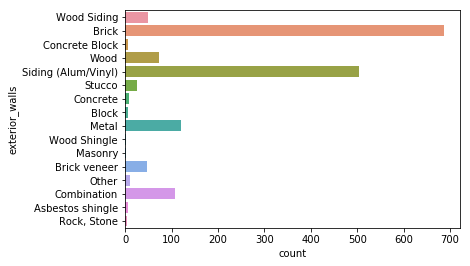

In [10]:
# Plotting exterior walls 
sns.countplot(y='exterior_walls', data=df)

**Observations:**
Take a look at the frequencies of the classes.

Several classes are quite prevalent in the dataset. They have long bars. Those include:
* 'Brick' shows count of 687 as we get in features and is most frequent
* 'Siding (Alum/Vinyl)'
* 'Metal'
* 'Combination'

Some classes have really short bars. For example:
* 'Concrete Block'
* 'Concrete'
* 'Block'
* 'Wood Shingle'
* others
* These don't have many observations, and they are called sparse classes.

Plot all the three categorical features

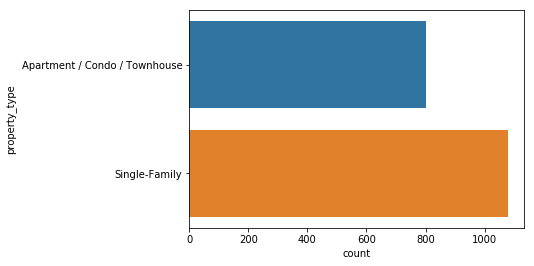

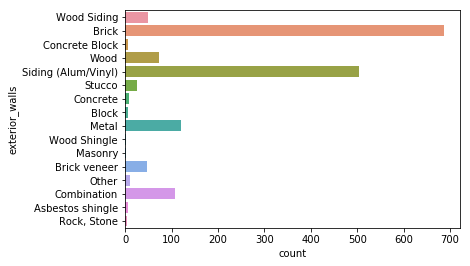

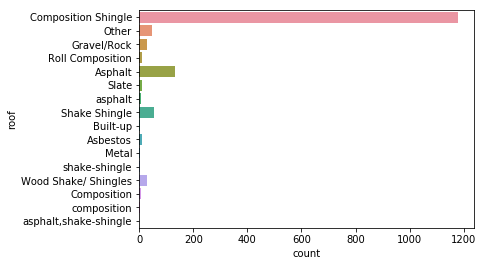

In [11]:
# Plotting barplot for each categorical feature
for feature in df.dtypes[df.dtypes == 'object'].index:
    sns.countplot(y=feature, data=df)
    plt.show()

## Sparse Classes
Sparse classes are classes in categorical features that have a very small number of observations.

They tend to be problematic when we get to building models.
* In the best case, they don't influence the model much.
* In the worst case, they can cause the model to be overfit.

We shall combine or re-assign these classes later 

Segmenting the target variable by key categorical features.

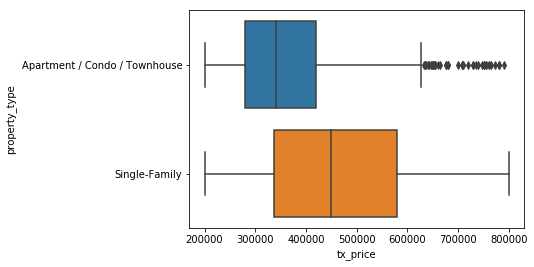

In [12]:
# Drawing boxplot of tx_price (target variable) by property type
sns.boxplot(y='property_type', x='tx_price', data=df)

Unsurprisingly, single-family homes are more expensive

Let's compare the two property types across other features as well

In [13]:
df.groupby('property_type').agg(['mean', 'std'])

tx_price                     beds  \
                                        mean            std      mean   
property_type                                                           
Apartment / Condo / Townhouse  366614.034869  121784.490486  2.601494   
Single-Family                  464644.711111  157758.739013  4.029630   

                                            baths                   sqft  \
                                    std      mean       std         mean   
property_type                                                              
Apartment / Condo / Townhouse  0.810220  2.200498  0.815009  1513.727273   
Single-Family                  0.795639  2.862037  0.937551  2935.865741   

                                             year_built             ...  \
                                       std         mean        std  ...   
property_type                                                       ...   
Apartment / Condo / Townhouse   556.286650  1988.936488  15.513640  ...   
Single-Family                  1422.871169  1978.523148  22.210582  ...   

                              property_tax               insurance             \
                                      mean         std        mean        std   
property_type                                                                   
Apartment / Condo / Townhouse   346.261519  142.292282  105.652553  47.118015   
Single-Family                   556.383333  244.351559  166.329630  77.816022   

                              median_school           num_schools            \
                                       mean       std        mean       std   
property_type                                                                 
Apartment / Condo / Townhouse      6.382316  1.941998    2.831880  0.455370   
Single-Family                      6.592593  2.031663    2.764815  0.537959   

                                   tx_year            
                                      mean       std  
property_type                                         
Apartment / Condo / Townhouse  2007.941469  4.099487  
Single-Family                  2006.494444  5.807059  

[2 rows x 46 columns]

** Observations **:
* Property having single-family is larger in sqft area.It also has more bedrooms than other property-type.
* Apartment/townhouse has larger lots than the property having single-family.
* Apartmenr/condo/Townhouse type of property is in areas with more restaurants,nightlife options,more grocery stores,shopping stores,active_life(gym,sports,yoga studios)
* Property_type such as apartments,Condo,Townhouse is more crowded and so have more fascilities but smaller in sqft area so have lesser price whereas property-type having single-family are generally large in size and has lesser fascilities as less crowded. 

In [14]:
# Correlations between numerical features
correlations = df.corr()

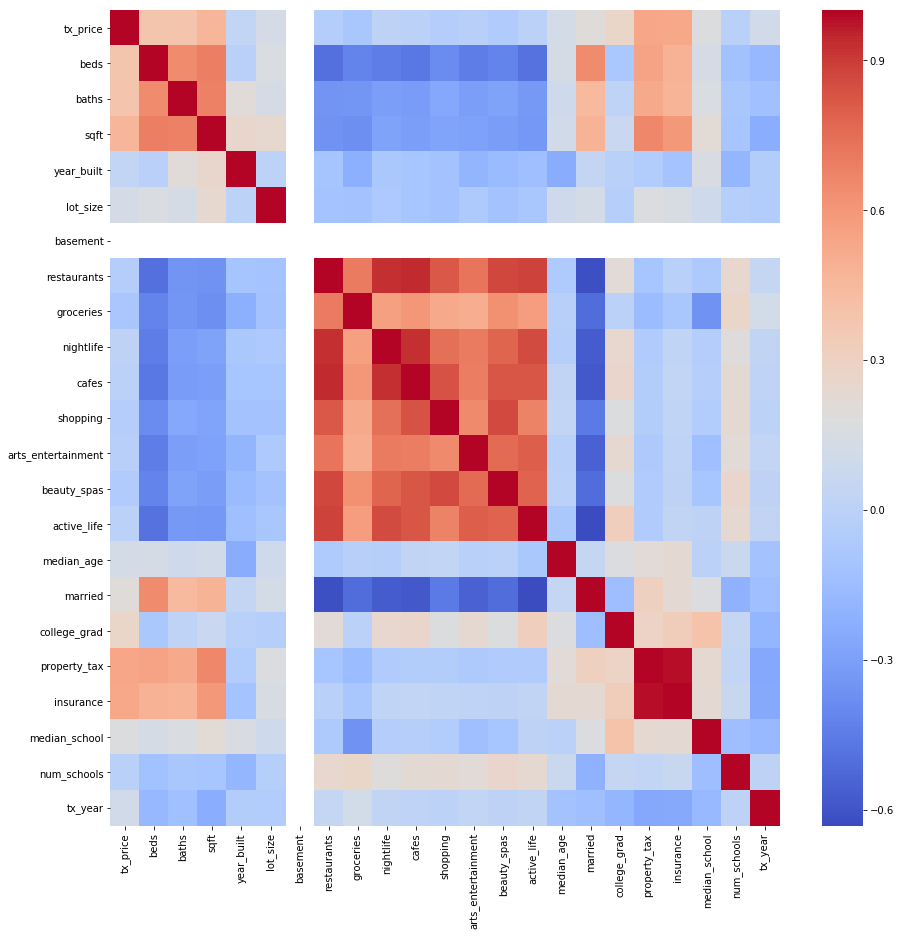

In [15]:
plt.figure(figsize=(15,15))

# Plotting heatmap
sns.heatmap(correlations, cmap='coolwarm')

* There is a strong negative correlation between beds and restaurants, or gloceries and median_schools.
* There is a weak positive correlation between 'tx_price' and 'property_tax'.

In [16]:
# Making a mask for the entire triangle
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

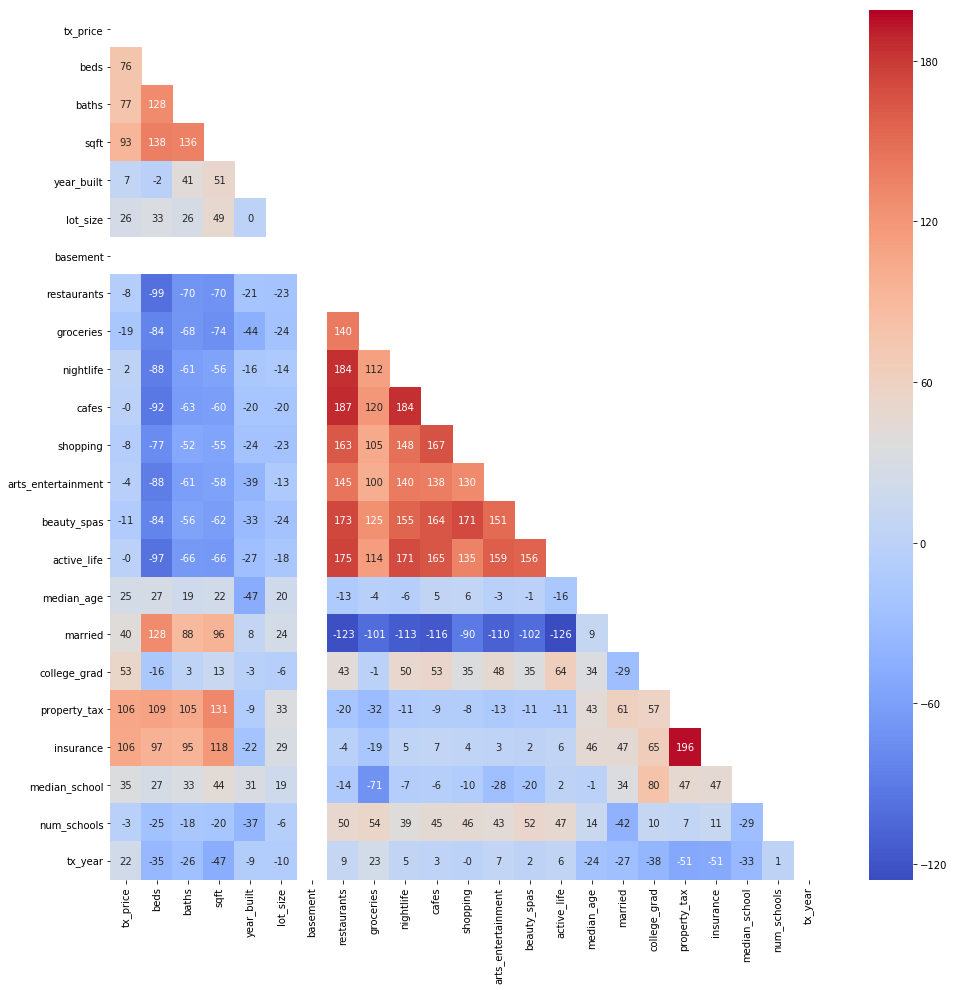

In [17]:
# Drawing the figure
plt.figure(figsize=(16,16))
# Plot the heatmap using the mask
sns.heatmap(correlations*199, cmap='coolwarm', annot=True, fmt='.0f', mask=mask)

# Data Cleaning

In [18]:
# Drop the duplicates
df = df.drop_duplicates()
df.shape

(1883, 26)

Looks like there were no duplicates on our dataset

In [19]:
df['basement'].unique()

array([nan,  1.])

The basement feature has some nan values

Fill missing 'basement' values with the value 0 so that 0 would imply no basement and 1 would imply that there is basement

In [20]:
# Replace the nan values in basement with 0
df['basement'] = df['basement'].fillna(0)

In [21]:
df['basement'].unique()

array([0., 1.])

## Correcting Typos

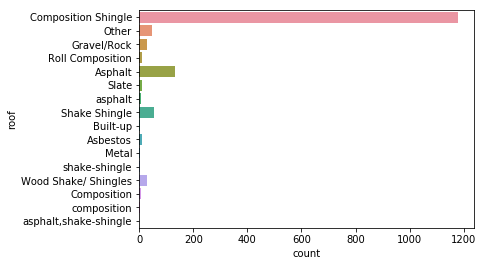

In [23]:
# Distribution of roof variable
sns.countplot(y='roof', data=df)

Using this plot, we can easily catch typos and inconsistent capitalization. For example:
* 'composition' should be 'Composition'
* 'asphalt' should be 'Asphalt'
* 'shake-shingle' should be 'Shake Shingle'
* 'asphalt,shake-shingle' could just be 'Shake Shingle'

In [24]:
# replacing 'composition' with 'Composition'
df['roof'].replace('composition', 'Composition', inplace=True)

# replacing 'asphalt' with 'Asphalt'
df['roof'].replace('asphalt', 'Asphalt', inplace=True)

# replacing 'shake-shingle' and 'asphalt,shake-shingle' with 'Shake Shingle'
df['roof'].replace(['shake-shingle', 'asphalt,shake-shingle'], 'Shake Shingle', inplace=True)

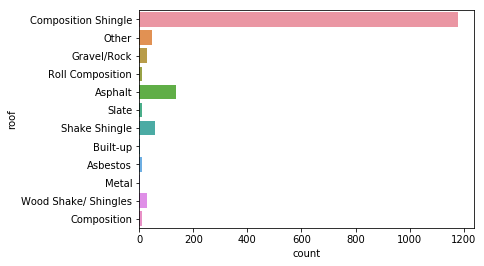

In [25]:
# Re-Checking roof's class distribution after cleaning
sns.countplot(y='roof', data=df)

##  Mislabeled classes
Finally, we'll check for classes that are labeled as separate classes when they should really be the same.
* e.g. If 'N/A' and 'Not Applicable' appear as two separate classes, we should combine them.
* let's plot the class distributions for 'exterior_walls':

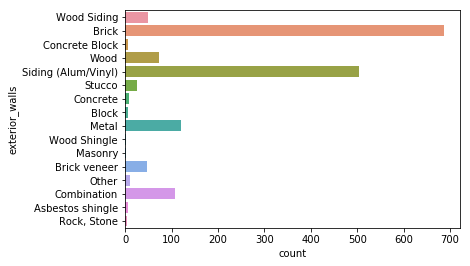

In [26]:
# Distribution of exterior_walls
sns.countplot(y='exterior_walls', data=df)

Using that chart, we can easily catch mislabeled classes. For example
* 'Rock, Stone' should be 'Masonry'
* 'Concrete' and 'Block' should both just be 'Concrete Block'

In [27]:
# Replacing 'Rock, Stone' with 'Masonry'
df['exterior_walls'].replace('Rock, Stone', 'Masonry', inplace=True)

In [28]:
# Replacing 'Concrete' and 'Black' with 'Comcrete Block'
df['exterior_walls'].replace(['Concrete', 'Block'], 'Concrete Block', inplace=True)

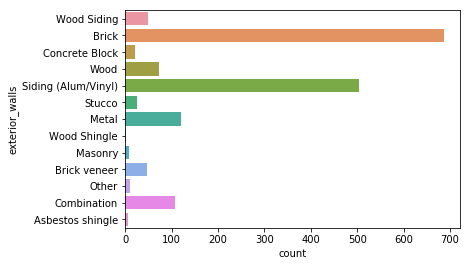

In [29]:
# Re-Checking distribution of 'exterior_walls' after cleaning
sns.countplot(y='exterior_walls', data=df)

# Removing Outliers

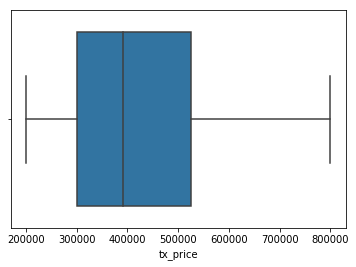

In [30]:
# Box plot of target variable 'tx_price'
sns.boxplot(df['tx_price'])

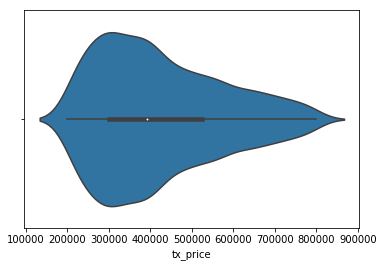

In [31]:
# Drawing the violin plot of 'tx_price' - to check probabilities 
sns.violinplot(df['tx_price'])

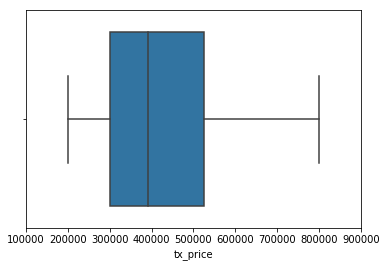

In [32]:
# Drawing bocx plot for 'tx_price' with the x-axis range as the violin plot
sns.boxplot(df['tx_price'])
plt.xlim(100000, 900000)
plt.show()

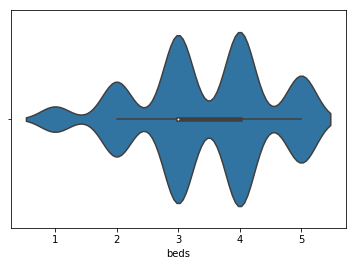

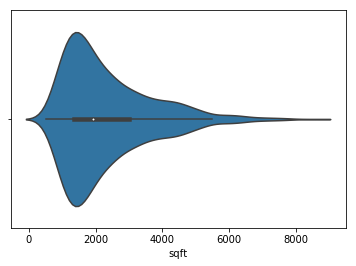

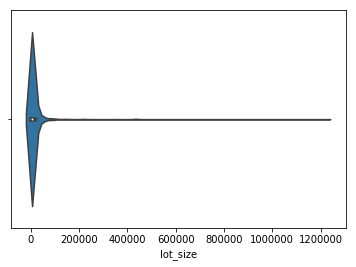

In [33]:
# violin plot of beds, sqft and lot_size
sns.violinplot(df['beds'])
plt.show()

sns.violinplot(df['sqft'])
plt.show()

sns.violinplot(df['lot_size'])
plt.show()

In [34]:
# Displaying the top five values of lot_size
df['lot_size'].sort_values(ascending=False).head()

102     1220551
1111     436471
1876     436035
1832     436035
1115     435600
Name: lot_size, dtype: int64

The largest property has a lot_size of 1,220,551 sqft. The next largest has a lot_size of only 436,471 sqft.

Because it's unlikely the REIT will ever invest in properties with lots that large, and because it's the only one in the dataset, let's remove it so it doesn't interfere with our ability to model normal size properties.

In [35]:
# Removing outliers in lot_size
df = df[df['lot_size'] <= 500000]

In [36]:
df.shape

(1882, 26)

##  Label missing categorical data

In [37]:
# Label missing categorical data as 'Missing'
df.select_dtypes(include='object').isnull().sum()
df['exterior_walls'] = df['exterior_walls'].fillna('Missing')
df['roof'] = df['roof'].fillna('Missing')

In [38]:
df.select_dtypes(include='object').isnull().sum()

property_type     0
exterior_walls    0
roof              0
dtype: int64

In [39]:
# Displaying the missing values for numeric features
df.select_dtypes(exclude='object').isnull().sum()

tx_price              0
beds                  0
baths                 0
sqft                  0
year_built            0
lot_size              0
basement              0
restaurants           0
groceries             0
nightlife             0
cafes                 0
shopping              0
arts_entertainment    0
beauty_spas           0
active_life           0
median_age            0
married               0
college_grad          0
property_tax          0
insurance             0
median_school         0
num_schools           0
tx_year               0
dtype: int64

# Feature Engineering

##  Indicator variables

* For example, let's say you knew that homes with 2 bedrooms and 2 bathrooms are especially popular for investors.
* Maybe you suspect these types of properties command premium prices. (You don't need to know for sure.)
* Create an indicator variable to flag properties with 2 beds and 2 baths and name it 'two_and_two'.

In [40]:
# Making an indicator variable for properties with 2 beds and 2 baths
df['two_and_two'] = ((df.beds == 2) & (df.baths == 2)).astype(int)

In [41]:
df.two_and_two.mean()

0.09458023379383634

As it turns out, almost 9.5% of the observations in our dataset were for properties with 2 beds and 2 baths.

### Example: housing market recession
According to data from Zillow, the lowest housing prices were from 2010 to end of 2013 (country-wide).

In [42]:
# Creating variable indicating trasaction between 2010 and 2013 (Recession uears)
df['durin_recession'] = ((df['tx_year'] >= 2010) & (df['tx_year'] <= 2013)).astype(int)

In [43]:
# Percentage of transactions that took place during recession years
df['durin_recession'].mean()

0.2635494155154091

## Interaction Features

In [44]:
# Creating a property age feature
df['property_age'] = df['tx_year'] - df['year_built']

In [45]:
# Checking whether property age has negative values
df[df['property_age'] < 0]['property_age']

406    -8
1140   -1
1459   -1
1540   -1
1556   -2
1572   -2
1718   -1
1782   -7
1798   -1
1809   -1
1826   -1
1828   -8
1864   -2
1866   -1
1870   -1
1872   -1
1874   -4
1877   -1
1878   -2
Name: property_age, dtype: int64

In [46]:
len(df[df['property_age'] < 0]['property_age'])

19

In [47]:
# Removing rows where property age is less than 0
df = df[df['property_age'] >= 0]
len(df)

1863

In [48]:
# Making a school score feature which is equal to num_schools * median_school
df['school_score'] = df['num_schools'] * df['median_school']

In [49]:
# Display median school score
df['school_score'].median()

18.0

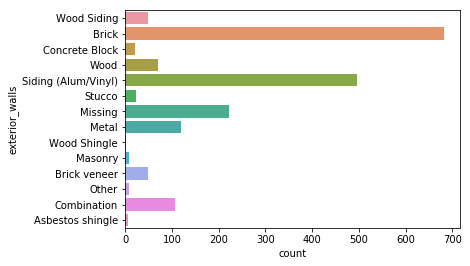

In [50]:
# Chcking exterior_walls for sparse classes
sns.countplot(y='exterior_walls', data=df)

In [51]:
# Putting 'Wood Siding' and 'Wood Shingle' together with 'Wood'
df['exterior_walls'].replace(['Wood Siding', 'Wood Shingle'], 'Wood', inplace=True)

In [52]:
# Group other classes with other
other_exterior_walls = ['Concrete Block', 'Stucco', 'Masonry', 'Other', 'Asbestos shingle']
df['exterior_walls'].replace(other_exterior_walls, 'Other', inplace=True)

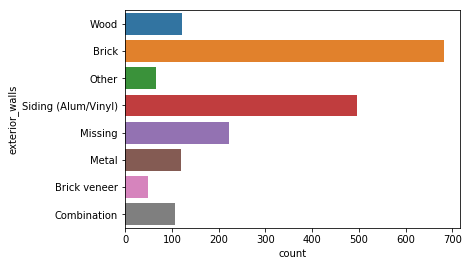

In [53]:
# Again making barplot for exterior_walls
sns.countplot(y='exterior_walls', data=df)

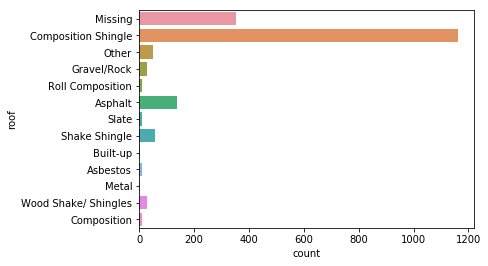

In [54]:
# Distribution of roof
sns.countplot(y='roof', data=df)

In [55]:
# Put together 'Composition' and 'Wood Shake/ Shingles' into 'Composition Shingle'
df['roof'].replace(['Composition', 'Wood Shake/ Shingles'], 'Composition Shingle', inplace=True)

In [56]:
# Listing everything else into 'other'
other_roof = ['Other', 'Gravel/Rock', 'Roll Composition', 'Slate', 'Built-up', 'Asbestos', 'Metal']
df['roof'].replace(other_roof, 'Other', inplace=True)

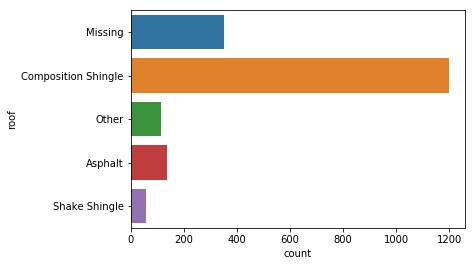

In [57]:
# Plotting roof
sns.countplot(y='roof', data=df)

## Encode dummy varaibles (One Hot Encoding)

In [58]:
# Creating a new Dataframe with dummy_variables
df = pd.get_dummies(df, columns=['exterior_walls', 'roof', 'property_type'])

In [59]:
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,...,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
0,295850,1,1,584,2013,0,0.0,107,9,30,...,0,0,1,0,0,1,0,0,1,0
1,216500,1,1,612,1965,0,1.0,105,15,6,...,0,0,0,0,1,0,0,0,1,0
2,279900,1,1,615,1963,0,0.0,183,13,31,...,0,0,1,0,0,1,0,0,1,0
3,379900,1,1,618,2000,33541,0.0,198,9,38,...,0,0,1,0,0,1,0,0,1,0
4,340000,1,1,634,1992,0,0.0,149,7,22,...,0,0,0,0,0,1,0,0,1,0


## Removing Redundant Features

In [60]:
# Dropping redundant features
df = df.drop(['tx_year', 'year_built'], axis=1)

## Training Machine Learning Models

In [61]:
from sklearn.linear_model import ElasticNet, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [62]:
df.shape

(1863, 40)

In [63]:
# Function for splitting training and test set
from sklearn.model_selection import train_test_split

In [64]:
# Separating target variable
y = df.tx_price

# Making separate variable for input features
X = df.drop('tx_price', axis=1)

In [65]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
# Verifying the splits

print(len(X_train), len(y_train), len(X_test), len(y_test))

1490 1490 373 373


In [67]:
# Importing function for creating pipelibe
from sklearn.pipeline import make_pipeline

In [68]:
# Importing function for standardization
from sklearn.preprocessing import StandardScaler

In [69]:
# Making a pipeline for Lasso regression
make_pipeline(StandardScaler(), Lasso(random_state=42))

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(random_state=42))])

In [70]:
# Making pipeline dictionary for each algorithm
pipelines = {
    'lasso': make_pipeline(StandardScaler(), Lasso(random_state=42)),
    'ridge': make_pipeline(StandardScaler(), Ridge(random_state=42)),
    'enet': make_pipeline(StandardScaler(), ElasticNet(random_state=42)),
    'rf': make_pipeline(StandardScaler(), RandomForestRegressor(random_state=42)),
    'gb': make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=42))
}

In [71]:
for key, value in pipelines.items():
    print(key)

lasso
ridge
enet
rf
gb


In [72]:
# Checking tuneable hyperparameters of Lasso Pipeline
pipelines['lasso'].get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('lasso', Lasso(random_state=42))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'lasso': Lasso(random_state=42),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'lasso__alpha': 1.0,
 'lasso__copy_X': True,
 'lasso__fit_intercept': True,
 'lasso__max_iter': 1000,
 'lasso__normalize': False,
 'lasso__positive': False,
 'lasso__precompute': False,
 'lasso__random_state': 42,
 'lasso__selection': 'cyclic',
 'lasso__tol': 0.0001,
 'lasso__warm_start': False}

In [73]:
lasso_hyperparameters = { 
    'lasso__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]}

ridge_hyperparameters = { 
    'ridge__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]}        

In [74]:
enet_hyperparameters = { 
    'elasticnet__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],                   
    'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9] # Ratio of L1 to L2
}

In [75]:
rf_hyperparameters = { 
    'randomforestregressor__n_estimators' : [100, 200], 
    'randomforestregressor__max_features': ['auto', 'sqrt', 0.33], 
}

In [76]:
gb_hyperparameters = { 
    'gradientboostingregressor__n_estimators': [100, 200], # number of trees
    'gradientboostingregressor__learning_rate' : [0.05, 0.1, 0.2], # shrinks the contribution of each tree
    'gradientboostingregressor__max_depth': [1, 3, 5] # maximum depth of each tree
}

In [77]:
hyperparameters = {
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters,
    'lasso' : lasso_hyperparameters,
    'ridge' : ridge_hyperparameters,
    'enet' : enet_hyperparameters
}

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


In [80]:
# Check that we have 5 cross-validation objects
for key, value in fitted_models.items():
    print( key, type(value) )

lasso <class 'sklearn.model_selection._search.GridSearchCV'>
ridge <class 'sklearn.model_selection._search.GridSearchCV'>
enet <class 'sklearn.model_selection._search.GridSearchCV'>
rf <class 'sklearn.model_selection._search.GridSearchCV'>
gb <class 'sklearn.model_selection._search.GridSearchCV'>


In [81]:
# check that the models have been fitted correctly
from sklearn.exceptions import NotFittedError

for name, model in fitted_models.items():
    try:
        pred = model.predict(X_test)
        print(name, 'has been fitted.')
    except NotFittedError as e:
        print(repr(e))

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


In [82]:
# Display best_score_ for each fitted model on the training set
# I.e., these are our holdout R2 scores on the training set
for name, model in fitted_models.items():
    print( name, model.best_score_ )

lasso 0.33763204642557976
ridge 0.34455877545945457
enet 0.36207768054387557
rf 0.49381068284438
gb 0.4984859192300978


In [83]:
# Import r2_score
from sklearn.metrics import r2_score

# Mean_absolute_error functions
from sklearn.metrics import mean_absolute_error

In [84]:
# Display fitted random forest object
fitted_models['rf']

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_features': ['auto', 'sqrt',
                                                                 0.33],
                         'randomforestregressor__n_estimators': [100, 200]})

In [85]:
# Predict test set using fitted random forest
pred = fitted_models['rf'].predict(X_test)

In [86]:
# Calculate and print R^2 and MAE
print( 'R^2:', r2_score(y_test, pred ))
print( 'MAE:', mean_absolute_error(y_test, pred))

R^2: 0.5087390431725649
MAE: 73863.02014745309


In [87]:
# Predict test set and compute eval metrics for all models
for name, model in fitted_models.items():
    pred = model.predict(X_test)
    print( name )
    print( '--------' )
    print( 'R^2:', r2_score(y_test, pred ))
    print( 'MAE:', mean_absolute_error(y_test, pred))
    print()

lasso
--------
R^2: 0.33021321608727794
MAE: 90829.69044209042

ridge
--------
R^2: 0.331914389252992
MAE: 90719.50851121797

enet
--------
R^2: 0.35321296016238213
MAE: 89631.59296446842

rf
--------
R^2: 0.5087390431725649
MAE: 73863.02014745309

gb
--------
R^2: 0.48758157096807053
MAE: 74922.96986015029



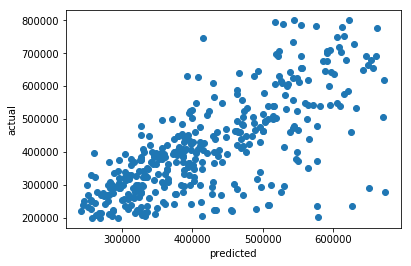

In [88]:
# Plot the performance of the winning model on the test set
gb_pred = fitted_models['rf'].predict(X_test)
plt.scatter(gb_pred, y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [89]:
fitted_models['rf'].best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_features=0.33, n_estimators=200,
                                       random_state=42))])